origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [39]:
%matplotlib inline
from __future__ import print_function

# 使用Variables和autograd实现
在前面的例子中，不得不手工实现了神经网络的前馈和反馈过程。手动实现反向传播过程对于两层网络并不是大问题，但是对于巨大复杂的网络却非常困难。

幸运的是，可以使用**自动微分**来自动计算神经网络中的反向传播。PyTorch中的**autograd**包就是用来实现这一功能的。当使用**autograd**时，网络的前馈传播将定义一个**计算图**：节点是**Tensor**，边则是函数，这些函数可以根据输入张量来计算输出张量。在反向传播的过程中，可以沿着图计算梯度。

**autograd**的机制看上去非常复杂，但是在实践中非常简单。首先将**Tensor**封装到一个**Variable**对象中，该对象表示计算图中的节点。若**x**是一个Variable，则**x.data**是一个Tensor，而**x.grad**是一个Variable，它封装了对某个标量值对**x**的梯度。

PyTorch中**Variables**与**Tensor**有着（几乎）相同的API：任何对**Tensor**可用的操作，对**Variable**同样有效。它们之间的差别是：使用**Variable**会创建一个计算图，以自动计算梯度。

接下来利用PyTorch的**Variable**和**autograd**来实现一个两层网络，现在不再需要手动实现反向传播过程了：

In [35]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# 若需要运行在GPU上则取消下一行的注释
# dtype = torch.cuda.FloatTensor

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建保存输入和输出的随机张量，并将张量封装到Variable当中
# 设置 requires_grad=Flase 意味着在反向传播的过程中，不需要计算关于x和y的梯度
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# 创建存储权重的随机张量，并将它们封装到Variable当中
# 设置 requires_grad=True，意味着在反向传播的过程中，需要计算关于w1和w2的梯度
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

# 设置学习率
learning_rate = 1e-6

# 存储训练过程的loss
losses = []

for t in range(500):
    # 前向传播：用Variable的运算来计算预测的y值；
    # 这与用Tensor实现的前向传播从本质上是一样的，但是由于不需要手动实现反向传播，
    # 因此不需要保持对中间变量的引用。
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # 用Variable支持的运算，计算并输出loss。
    # loss是一个形状为(1,)，loss.data是一个形状为(1,)的张量。
    # 因此loss.data[0]存储loss的标量值。
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # 存储损失
    losses.append(loss.data[0])
    
    # 使用autograd来计算反向传播。调用backward将计算loss关于需要求导的变量的梯度，
    # 通过设置requires_grad=True来设置变量需要求导。
    # 调用完成之后，变量（Variable）w1.grad和w2.grad将分别保存loss关于w1和w2的梯度
    loss.backward()
    
    # 用梯度下降算法更新权重。
    # w1.grad和w2.grad是变量（Variable），而w1.grad.data和w2.grad.data是张量
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    # 更新权重后，要将梯度手工清零
    # 因为backward过程是将新计算出来的梯度累加到现存的梯度上。
    w1.grad.data.zero_()
    w2.grad.data.zero_()

(0, 29932376.0)
(1, 29294076.0)
(2, 36446632.0)
(3, 45305572.0)
(4, 46360520.0)
(5, 33209082.0)
(6, 16061441.0)
(7, 6098585.5)
(8, 2558574.25)
(9, 1456576.625)
(10, 1052032.875)
(11, 844920.4375)
(12, 705686.8125)
(13, 598862.75)
(14, 512707.09375)
(15, 441789.125)
(16, 382639.8125)
(17, 332916.53125)
(18, 290848.40625)
(19, 255124.78125)
(20, 224624.109375)
(21, 198433.015625)
(22, 175851.140625)
(23, 156314.453125)
(24, 139355.609375)
(25, 124567.84375)
(26, 111636.9140625)
(27, 100288.6015625)
(28, 90298.890625)
(29, 81483.1796875)
(30, 73685.0)
(31, 66782.640625)
(32, 60633.3125)
(33, 55149.42578125)
(34, 50247.33984375)
(35, 45855.9296875)
(36, 41913.38671875)
(37, 38369.75390625)
(38, 35174.89453125)
(39, 32290.1171875)
(40, 29680.140625)
(41, 27315.251953125)
(42, 25168.70703125)
(43, 23216.703125)
(44, 21438.490234375)
(45, 19816.439453125)
(46, 18334.92578125)
(47, 16979.60546875)
(48, 15738.0791015625)
(49, 14599.4638671875)
(50, 13553.9228515625)
(51, 12593.0498046875)
(52, 

(410, 0.0007258341065607965)
(411, 0.0007044964004307985)
(412, 0.0006840134155936539)
(413, 0.0006625623791478574)
(414, 0.0006451128283515573)
(415, 0.0006267348071560264)
(416, 0.0006074779666960239)
(417, 0.0005909196916036308)
(418, 0.0005732661811634898)
(419, 0.0005565555184148252)
(420, 0.0005403372342698276)
(421, 0.0005241833860054612)
(422, 0.0005093888030387461)
(423, 0.0004956190823577344)
(424, 0.00048256496665999293)
(425, 0.0004690308414865285)
(426, 0.0004565826093312353)
(427, 0.0004437913012225181)
(428, 0.0004318080027587712)
(429, 0.0004207433375995606)
(430, 0.00040918102604337037)
(431, 0.0003985745133832097)
(432, 0.00038796354783698916)
(433, 0.00037862619501538575)
(434, 0.0003692866594064981)
(435, 0.0003596935130190104)
(436, 0.0003500572929624468)
(437, 0.00034045788925141096)
(438, 0.00033315172186121345)
(439, 0.0003245194675400853)
(440, 0.00031606602715328336)
(441, 0.00030824457644484937)
(442, 0.0003005155303981155)
(443, 0.0002934553485829383)
(444, 

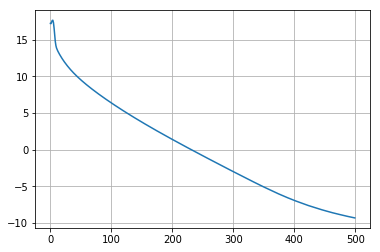

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log(np.array(losses)))
plt.grid()